Insurance-Dataset

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings

In [2]:
#Loading Dataset
data=pd.read_csv("insurance.csv")

In [3]:
#head
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#tail
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
#shape
data.shape

(1338, 7)

In [6]:
#describtion
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#Data preprocessing
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Analysis

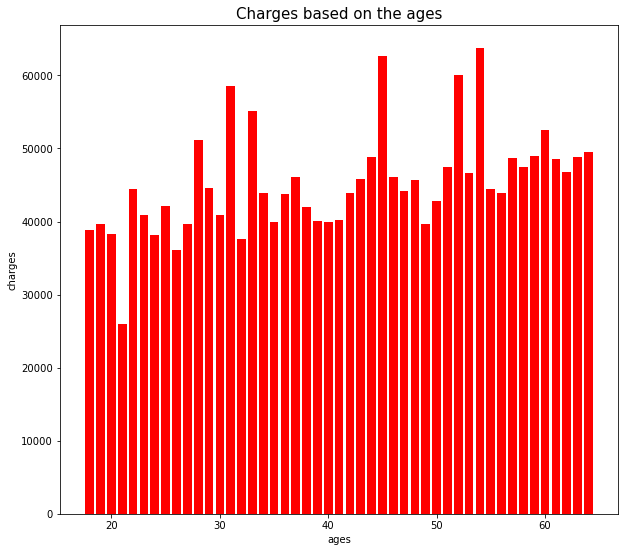

In [9]:
plt.figure(figsize=(10,9))
plt.bar(data['age'].values,data['charges'].values,color='r')
plt.xlabel("ages",size=10)
plt.ylabel("charges",size=10)
plt.title("Charges based on the ages",size=15)
plt.show()

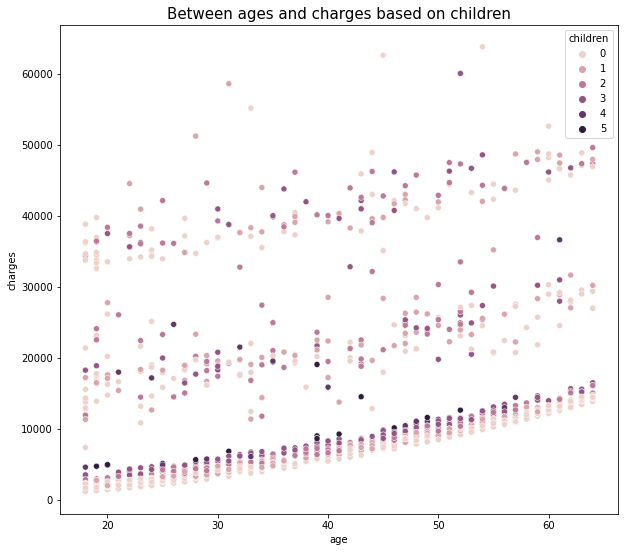

In [10]:
plt.figure(figsize=(10,9))
sbn.scatterplot(x="age",y="charges",hue='children',data=data)
plt.title("Between ages and charges based on children",size=15)
plt.show()

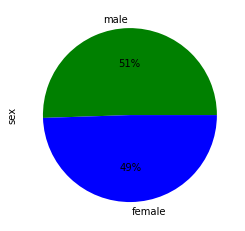

In [11]:
data.sex.value_counts().plot.pie(colors=['green','blue'],autopct='%1.0f%%')
plt.show()

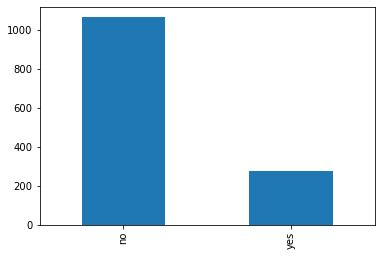

In [12]:
data.smoker.value_counts().plot.bar()
plt.show()

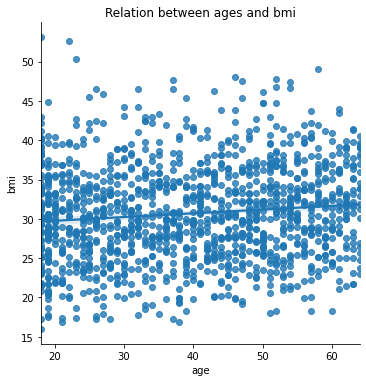

In [13]:
sbn.lmplot(x='age',y='bmi',data=data)
plt.title("Relation between ages and bmi")
plt.show()

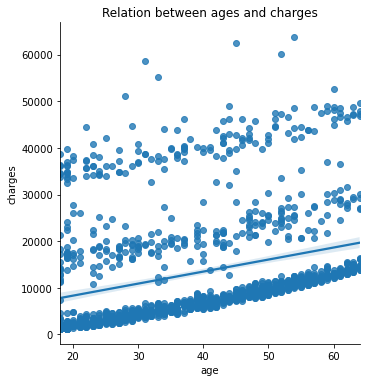

In [14]:
sbn.lmplot(x='age',y='charges',data=data)
plt.title("Relation between ages and charges")
plt.show()

In [15]:
#handling categories
#mapping to handle the sex columns
mapping={'male':0,'female':1}
data['sex']=data.sex.map(mapping)
data['sex'].value_counts()

0    676
1    662
Name: sex, dtype: int64

In [16]:
#mapping to handle the smoker columns
mapping={'yes':0,'no':1}
data['smoker']=data.smoker.map(mapping)
#mapping to handle the region columns
mapping_region={'southeast':0,'southwest':1,'northwest':2,'northeast':3}
data['region']=data.region.map(mapping_region)

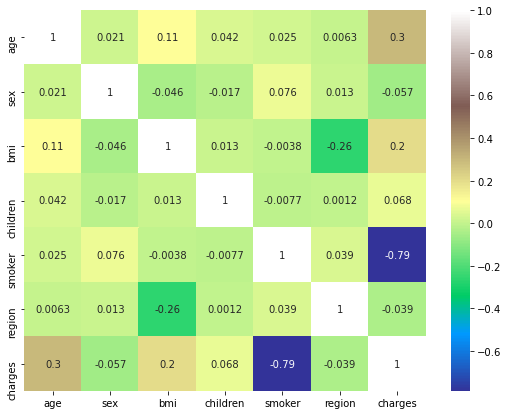

In [22]:
#heatmap
plt.figure(figsize=(9,7))
cor=data.corr()
sbn.heatmap(cor,annot=True,cmap='terrain')
plt.show()

Modelling

In [23]:
x=data.drop(['charges'],axis=1)
y=data['charges']

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [26]:
models=[RandomForestRegressor(),DecisionTreeRegressor(),ExtraTreeRegressor(),LinearRegression()]

In [29]:
for model in models:
    kfold=KFold(n_splits=10,random_state=7)
    print('model:',model)
    cv_score=cross_val_score(model,x,y,cv=kfold)
    print("cv_score:",cv_score.mean()*100.0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


model: RandomForestRegressor()
cv_score: 83.49223895569968
model: DecisionTreeRegressor()
cv_score: 72.54078087192116
model: ExtraTreeRegressor()
cv_score: 69.02079439416224
model: LinearRegression()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


cv_score: 74.50031044596808
